In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [2]:
pd.__version__

'2.2.3'

In [5]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2025-01.parquet')

In [4]:
df_val = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2025-02.parquet')

In [6]:
!pip install pyarrow


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.0


In [7]:
import sklearn

In [8]:
sklearn.__version__

'1.6.1'

In [9]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2025-01.parquet')

In [10]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-01-01 00:03:01,2025-01-01 00:17:12,N,1.0,75,235,1.0,5.93,24.70,...,0.5,6.80,0.00,NaN,1.0,34.00,1.0,1.0,0.00,0.0
1,2,2025-01-01 00:19:59,2025-01-01 00:25:52,N,1.0,166,75,1.0,1.32,8.60,...,0.5,0.00,0.00,NaN,1.0,11.10,2.0,1.0,0.00,0.0
2,2,2025-01-01 00:05:29,2025-01-01 00:07:21,N,5.0,171,73,1.0,0.41,25.55,...,0.0,0.00,0.00,NaN,1.0,26.55,2.0,2.0,0.00,0.0
3,2,2025-01-01 00:52:24,2025-01-01 01:07:52,N,1.0,74,223,1.0,4.12,21.20,...,0.5,6.13,6.94,NaN,1.0,36.77,1.0,1.0,0.00,0.0
4,2,2025-01-01 00:25:05,2025-01-01 01:01:10,N,1.0,66,158,1.0,4.71,33.80,...,0.5,7.81,0.00,NaN,1.0,46.86,1.0,1.0,2.75,0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48326 entries, 0 to 48325
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               48326 non-null  int32         
 1   lpep_pickup_datetime   48326 non-null  datetime64[us]
 2   lpep_dropoff_datetime  48326 non-null  datetime64[us]
 3   store_and_fwd_flag     46490 non-null  object        
 4   RatecodeID             46490 non-null  float64       
 5   PULocationID           48326 non-null  int32         
 6   DOLocationID           48326 non-null  int32         
 7   passenger_count        46490 non-null  float64       
 8   trip_distance          48326 non-null  float64       
 9   fare_amount            48326 non-null  float64       
 10  extra                  48326 non-null  float64       
 11  mta_tax                48326 non-null  float64       
 12  tip_amount             48326 non-null  float64       
 13  t

In [83]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1683 entries, 8 to 44100
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               1683 non-null   int32         
 1   lpep_pickup_datetime   1683 non-null   datetime64[us]
 2   lpep_dropoff_datetime  1683 non-null   datetime64[us]
 3   store_and_fwd_flag     1683 non-null   object        
 4   RatecodeID             1683 non-null   float64       
 5   PULocationID           1683 non-null   int32         
 6   DOLocationID           1683 non-null   int32         
 7   passenger_count        1683 non-null   float64       
 8   trip_distance          1683 non-null   float64       
 9   fare_amount            1683 non-null   float64       
 10  extra                  1683 non-null   float64       
 11  mta_tax                1683 non-null   float64       
 12  tip_amount             1683 non-null   float64       
 13  tolls_a

In [11]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime

In [12]:
df_val['duration'] = df_val.lpep_dropoff_datetime - df_val.lpep_pickup_datetime

In [13]:
df.duration = df.duration.apply(lambda td: td.total_seconds()/60)

In [14]:
df_val.duration = df_val.duration.apply(lambda td: td.total_seconds()/60)

In [20]:
td = df.duration.iloc[0]

In [22]:
td.total_seconds()/60

14.183333333333334

In [26]:
df = df[df.trip_type == 2]

In [86]:
df_val = df_val[df_val.trip_type == 2]

In [27]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee,duration
2,2,2025-01-01 00:05:29,2025-01-01 00:07:21,N,5.0,171,73,1.0,0.41,25.55,...,0.00,0.0,NaN,1.0,26.55,2.0,2.0,0.00,0.0,1.866667
11,2,2025-01-01 00:18:31,2025-01-01 00:18:46,N,5.0,92,92,1.0,0.00,35.00,...,2.00,0.0,NaN,1.0,38.00,1.0,2.0,0.00,0.0,0.250000
15,2,2025-01-01 00:31:59,2025-01-01 00:32:02,N,5.0,66,66,0.0,0.03,76.00,...,15.40,0.0,NaN,1.0,92.40,1.0,2.0,0.00,0.0,0.050000
18,2,2025-01-01 00:20:31,2025-01-01 00:20:34,N,5.0,197,197,1.0,0.00,13.00,...,1.00,0.0,NaN,1.0,15.00,1.0,2.0,0.00,0.0,0.050000
28,2,2025-01-01 00:48:38,2025-01-01 01:33:50,N,5.0,33,220,2.0,17.07,87.00,...,18.15,0.0,NaN,1.0,108.90,1.0,2.0,2.75,0.0,45.200000


/tmp/ipykernel_21361/1804654473.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.displot(df.duration), sns.distplot(df_val.duration)


(<seaborn.axisgrid.FacetGrid at 0x7c42d5603ef0>,
 <Axes: xlabel='duration', ylabel='Count'>)

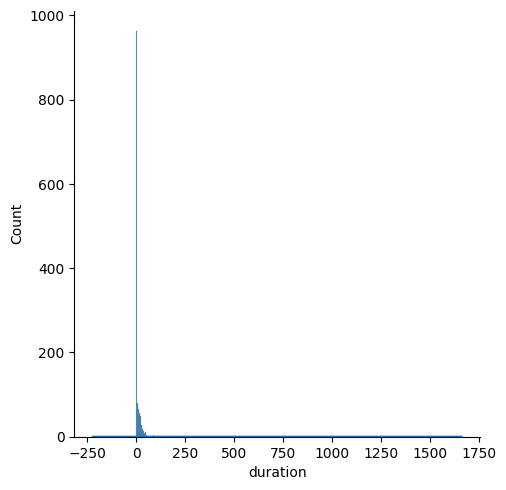

In [72]:
sns.displot(df.duration), sns.distplot(df_val.duration)

In [32]:
df.duration.describe(percentiles=[0.95, 0.96, 0.99])

count    1803.000000
mean       15.896349
std        89.490679
min         0.000000
50%         1.300000
95%        38.536667
96%        41.814000
99%       106.789667
max      1439.650000
Name: duration, dtype: float64

In [36]:
((df.duration >= 1) & (df.duration <= 60)).mean()

np.float64(0.4963948973932335)

In [38]:
df.duration.describe() 

count    1803.000000
mean       15.896349
std        89.490679
min         0.000000
25%         0.066667
50%         1.300000
75%        14.425000
max      1439.650000
Name: duration, dtype: float64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1803 entries, 2 to 46481
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               1803 non-null   int32         
 1   lpep_pickup_datetime   1803 non-null   datetime64[us]
 2   lpep_dropoff_datetime  1803 non-null   datetime64[us]
 3   store_and_fwd_flag     1803 non-null   object        
 4   RatecodeID             1803 non-null   float64       
 5   PULocationID           1803 non-null   int32         
 6   DOLocationID           1803 non-null   int32         
 7   passenger_count        1803 non-null   float64       
 8   trip_distance          1803 non-null   float64       
 9   fare_amount            1803 non-null   float64       
 10  extra                  1803 non-null   float64       
 11  mta_tax                1803 non-null   float64       
 12  tip_amount             1803 non-null   float64       
 13  tolls_a

In [40]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

In [42]:
df [categorical + numerical].iloc[:10].to_dict(orient='records')

[{'PULocationID': 171, 'DOLocationID': 73, 'trip_distance': 0.41},
 {'PULocationID': 92, 'DOLocationID': 92, 'trip_distance': 0.0},
 {'PULocationID': 66, 'DOLocationID': 66, 'trip_distance': 0.03},
 {'PULocationID': 197, 'DOLocationID': 197, 'trip_distance': 0.0},
 {'PULocationID': 33, 'DOLocationID': 220, 'trip_distance': 17.07},
 {'PULocationID': 129, 'DOLocationID': 129, 'trip_distance': 0.01},
 {'PULocationID': 66, 'DOLocationID': 66, 'trip_distance': 0.0},
 {'PULocationID': 66, 'DOLocationID': 66, 'trip_distance': 0.04},
 {'PULocationID': 66, 'DOLocationID': 125, 'trip_distance': 2.84},
 {'PULocationID': 36, 'DOLocationID': 209, 'trip_distance': 4.86}]

In [43]:
train_dict = df[categorical + numerical].to_dict(orient='records')

In [87]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')

In [50]:
len(train_dict)

1803

In [88]:
len(val_dict)

1683

In [46]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)

In [89]:
X_val = dv.transform(val_dict)

In [54]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5409 stored elements and shape (1803, 3)>

In [51]:
y_train = df.duration.values

In [52]:
y_train

array([ 1.86666667,  0.25      ,  0.05      , ..., 46.43333333,
        3.3       , 15.08333333], shape=(1803,))

In [90]:
y_val = df_val.duration.values

In [91]:
df_val.duration.isna().sum()


np.int64(0)

In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred = lr.predict(X_train)

In [92]:
y_pred_val = lr.predict(X_val)

/tmp/ipykernel_21361/1505421196.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_21361/1505421196.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


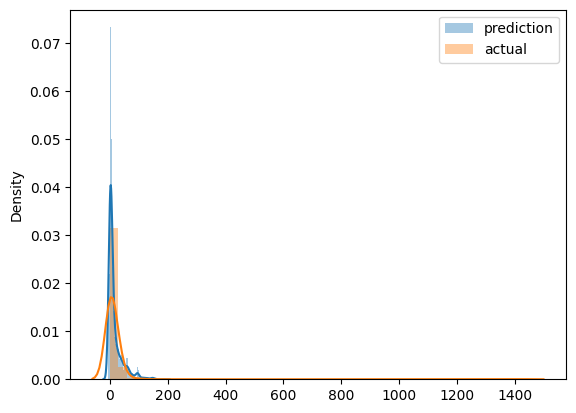

In [61]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')
plt.legend()

In [67]:
np.sqrt(mean_squared_error(y_train, y_pred)), root_mean_squared_error(y_train, y_pred)

(np.float64(85.66542624191771), 85.66542624191771)

In [93]:
df_val.duration.isna().sum()

np.int64(0)

In [94]:
np.sqrt(mean_squared_error(y_val, y_pred_val)), root_mean_squared_error(y_val, y_pred_val)

(np.float64(113.03743814191856), 113.03743814191856)

In [29]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [30]:
df_val = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [6]:
df.info() #Q1: 19 Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [31]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime

In [32]:
df_val['duration'] = df_val.tpep_dropoff_datetime - df_val.tpep_pickup_datetime

In [33]:
df.duration = df['duration'].apply(lambda td: td.total_seconds()/60)

In [34]:
df_val.duration = df_val['duration'].apply(lambda td: td.total_seconds()/60)

In [11]:
df.duration.iloc[:5]

0     8.433333
1     6.316667
2    12.750000
3     9.616667
4    10.833333
Name: duration, dtype: float64

In [35]:
df.duration.describe() #std      4.259435e+01

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [14]:
df[(df.duration >=1) & (df.duration <= 60)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


In [16]:
df[(df.duration < 1) | (df.duration > 60)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
59,2,2023-01-01 00:22:39,2023-01-01 01:30:45,1.0,16.02,1.0,N,132,265,2,61.10,1.0,0.5,0.00,0.00,1.0,64.85,0.0,1.25,68.100000
61,2,2023-01-01 00:42:11,2023-01-01 00:43:02,1.0,0.03,1.0,N,163,163,2,3.00,1.0,0.5,0.00,0.00,1.0,8.00,2.5,0.00,0.850000
95,2,2023-01-01 00:20:38,2023-01-01 00:21:26,1.0,0.08,1.0,N,75,75,2,3.00,1.0,0.5,0.00,0.00,1.0,5.50,0.0,0.00,0.800000
311,2,2023-01-01 00:12:04,2023-01-01 00:12:27,3.0,0.27,1.0,N,194,194,2,3.70,1.0,0.5,0.00,13.10,1.0,19.30,0.0,0.00,0.383333
333,1,2023-01-01 00:57:44,2023-01-01 00:57:59,1.0,0.00,1.0,N,137,137,3,3.00,3.5,0.5,0.00,0.00,1.0,8.00,2.5,0.00,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066068,2,2023-01-31 17:38:06,2023-01-31 18:43:18,NaN,21.90,NaN,None,143,132,0,77.00,0.0,0.5,10.00,6.55,1.0,97.55,NaN,NaN,65.200000
3066081,2,2023-01-31 17:44:41,2023-01-31 18:48:49,NaN,18.57,NaN,None,237,132,0,77.00,0.0,0.5,16.20,0.00,1.0,97.20,NaN,NaN,64.133333
3066159,2,2023-01-31 17:30:32,2023-01-31 18:37:19,NaN,14.84,NaN,None,141,132,0,77.00,0.0,0.5,8.10,0.00,1.0,89.10,NaN,NaN,66.783333
3066164,2,2023-01-31 17:37:00,2023-01-31 18:50:00,NaN,8.09,NaN,None,230,225,0,37.28,0.0,0.5,6.19,0.00,1.0,47.47,NaN,NaN,73.000000


In [36]:
df[(df.duration >=1) & (df.duration <= 60)].count()/df.count() #98%

VendorID                 0.981220
tpep_pickup_datetime     0.981220
tpep_dropoff_datetime    0.981220
passenger_count          0.980983
trip_distance            0.981220
RatecodeID               0.980983
store_and_fwd_flag       0.980983
PULocationID             0.981220
DOLocationID             0.981220
payment_type             0.981220
fare_amount              0.981220
extra                    0.981220
mta_tax                  0.981220
tip_amount               0.981220
tolls_amount             0.981220
improvement_surcharge    0.981220
total_amount             0.981220
congestion_surcharge     0.980983
airport_fee              0.980983
duration                 0.981220
dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [37]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']
df[categorical] = df[categorical].astype(str)

In [38]:
df = df[(df.duration >=1) & (df.duration <= 60)]

In [39]:
df_val = df_val[(df_val.duration >=1) & (df_val.duration <= 60)]

In [40]:
train_dict = df[categorical].to_dict(orient='records')

In [41]:
val_dict = df_val[categorical].to_dict(orient='records')

In [42]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)
X_train #515 COlumns

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6018346 stored elements and shape (3009173, 515)>

In [49]:
X_val = dv.transform(val_dict)
X_val 

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 0 stored elements and shape (2855951, 515)>

In [45]:
y_train = df.duration.values

In [50]:
y_val = df_val.duration.values

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = lr.predict(X_train)
rmse_train = root_mean_squared_error(y_train, y_pred)
rmse_train #7.64 

7.649261932106969

In [52]:
y_pred_val = lr.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred_val)
rmse_val #13.32

13.3223404359502